In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from IPython.display import display
import os   

In [2]:
# Step 2: File upload function for Jupyter Notebook
def load_csv_in_jupyter():
    try:
        # Option 1: Direct File Path
        dataset_path = input("Enter the file path for your CSV dataset (or press Enter to upload): ").strip()
        
        if dataset_path and os.path.exists(dataset_path):
            print(f"Loading dataset from path: {dataset_path}")
            return pd.read_csv(dataset_path)
        else:
            # Option 2: Manual Upload
            print("Upload your dataset...")
            from ipywidgets import FileUpload
            upload = FileUpload(accept='.csv', multiple=False)
            display(upload)

            # Wait for the user to upload a file
            while not upload.value:
                pass  # Keeps checking until a file is uploaded
            
            uploaded_file = list(upload.value.values())[0]
            dataset = pd.read_csv(io.BytesIO(uploaded_file['content']))
            print("Dataset uploaded successfully!")
            return dataset

    except Exception as e:
        print(f"Error occurred: {e}")
        return None

ERROR! Session/line number was not unique in database. History logging moved to new session 42


In [3]:
# Step 3: Load the dataset
credit_card_data = load_csv_in_jupyter()

Enter the file path for your CSV dataset (or press Enter to upload):  Downloads/creditcard_2023.csv


Loading dataset from path: Downloads/creditcard_2023.csv


In [4]:
# Step 4: Display the first few rows and dataset info
if credit_card_data is not None:
    print(credit_card_data.head())
    credit_card_data.info()

    # Check for missing values
    print("\nMissing values in dataset:")
    print(credit_card_data.isnull().sum())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [5]:
# Step 5: Split data for analysis
if credit_card_data is not None:
    legit = credit_card_data[credit_card_data['Class'] == 0]
    fraud = credit_card_data[credit_card_data['Class'] == 1]
    
    print(f"Legit transactions: {legit.shape}")
    print(f"Fraud transactions: {fraud.shape}")
    
    legit_sample = legit.sample(n=len(fraud))  # Balance dataset
    new_dataset = pd.concat([legit_sample, fraud], axis=0)

    print("\nNew Dataset Info:")
    new_dataset.info()

    # Separate features and target variable
    X = new_dataset.drop(columns='Class', axis=1)
    Y = new_dataset['Class']

    # Split into training and testing data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

    print(f"Shapes of Data: X: {X.shape}, X_train: {X_train.shape}, X_test: {X_test.shape}")

Legit transactions: (284315, 31)
Fraud transactions: (284315, 31)

New Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 568630 entries, 196870 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V

In [6]:
model = KNeighborsClassifier(n_neighbors=50)

In [7]:
import time

# Start the timer
start_time = time.time()

# Fit the model
model.fit(X_train, Y_train)

# End the timer
end_time = time.time()

# Calculate and display the elapsed time
elapsed_time = end_time - start_time
print(f"Time taken to fit the model: {elapsed_time:.2f} seconds")

Time taken to fit the model: 0.12 seconds


In [8]:
    # Step 7: Evaluate the model
start = time.time()
    training_accuracy = model.score(X_train, Y_train)
    test_accuracy = model.score(X_test, Y_test)
end = time.time()
elapsed = end - start
print(f"Time taken: {elapsed:.2f}")
    print("\nModel Evaluation:")
    print(f"Training Accuracy: {training_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")

Time taken: 534.95

Model Evaluation:
Training Accuracy: 0.9990591421486731
Test Accuracy: 0.9989975907004555


In [9]:
# Make predictions on the test set
Y_pred = model.predict(X_test)
Y_pred_proba = model.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

[[56855     8]
 [  106 56757]]


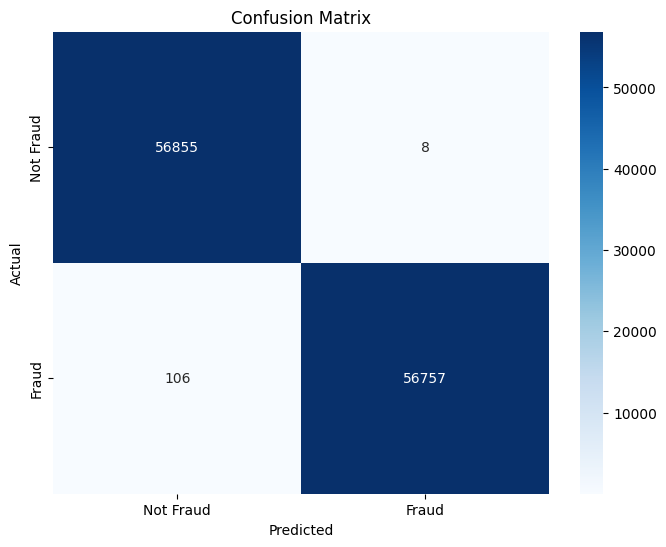

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Print classification report
print(classification_report(Y_test, Y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ROC AUC Score: 0.999302600988526


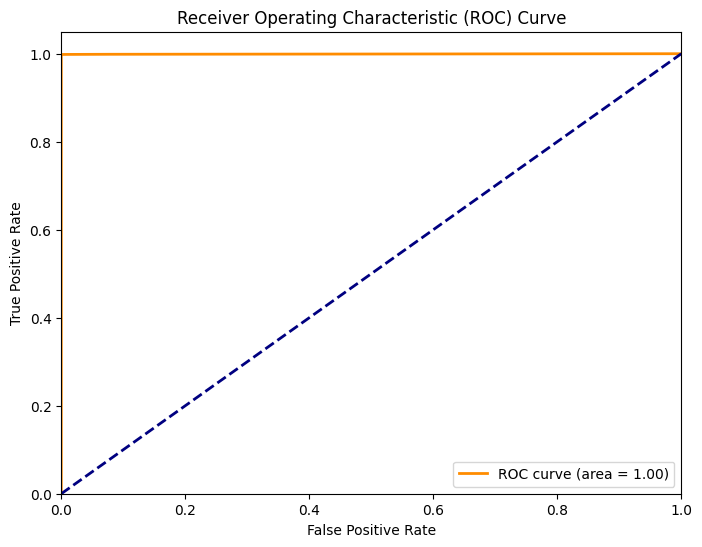

In [11]:
# ROC AUC Score
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
print(f'ROC AUC Score: {roc_auc}')

# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [12]:
# Calculate Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9990


In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier

# Calculate permutation importance
perm_importance = permutation_importance(model, X_test, Y_test, n_repeats=10, random_state=42)

# Extract feature importance and feature names
feature_importance = perm_importance.importances_mean
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (KNN - Permutation Importance)')
plt.xlabel('Mean Importance (Impact on Model Performance)')
plt.ylabel('Features')
plt.show()


In [ ]:
# Plot the distribution of the 'Amount' feature
plt.figure(figsize=(10, 6))
sns.histplot(credit_card_data['Amount'], kde=True, bins=30)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plot the distribution of the 'id' feature
plt.figure(figsize=(10, 6))
sns.histplot(credit_card_data['id'], kde=True, bins=30)
plt.title('Distribution of Transaction id')
plt.xlabel('id')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
corr = credit_card_data.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Example transaction data
new_transaction = {
    'id': 100000,
    'V1': -1.3598071336738,
    'V2': -0.0727811733098497,
    'V3': 2.53634673796914,
    'V4': 1.37815522427443,
    'V5': -0.338320769942518,
    'V6': 0.462387777762292,
    'V7': 0.239598554061257,
    'V8': 0.0986979012610507,
    'V9': 0.36378696961081,
    'V10': 0.090794171978831,
    'V11': -0.551599533260813,
    'V12': -0.617800855762348,
    'V13': -0.991389847235408,
    'V14': -0.311169353699879,
    'V15': 1.46817697209612,
    'V16': -0.470400525259478,
    'V17': 0.207971241929242,
    'V18': 0.0257905801965587,
    'V19': 0.403992960255733,
    'V20': 0.251412098259138,
    'V21': -0.018306777944153,
    'V22': 0.277837575558899,
    'V23': -0.110473910188727,
    'V24': 0.0669280749146731,
    'V25': 0.128539358273528,
    'V26': -0.189114843888824,
    'V27': 0.133558376740387,
    'V28': -0.021053053453821,
    'Amount': 123.5
}

# Convert the dictionary to a DataFrame
new_transaction_df = pd.DataFrame([new_transaction])

# Scale the 'Amount' feature
new_transaction_df['Amount'] = scaler.transform(new_transaction_df['Amount'].values.reshape(-1, 1))

# Predict the class
prediction = model.predict(new_transaction_df)
probability = model.predict_proba(new_transaction_df)[:, 1]

print(f'Prediction: {"Fraud" if prediction[0] == 1 else "Not Fraud"}')
print(f'Probability of Fraud: {probability[0]:.4f}')

In [ ]:
# Example transaction data
new_non_fraud_transaction = {
    'id': 10000,
    'V1': -0.5448621018518518,
    'V2': 0.5448621018518518,
    'V3': -0.5448621018518518,
    'V4': 1.5448621018518518,
    'V5': -0.5448621018518518,
    'V6': 0.5448621018518518,
    'V7': -0.5448621018518518,
    'V8': 0.5448621018518518,
    'V9': -0.5448621018518518,
    'V10': 0.5448621018518518,
    'V11': -1.5448621018518518,
    'V12': 1.5448621018518518,
    'V13': -0.5448621018518518,
    'V14': 0.5448621018518518,
    'V15': -0.5448621018518518,
    'V16': 0.5448621018518518,
    'V17': -0.5448621018518518,
    'V18': 0.5448621018518518,
    'V19': -0.5448621018518518,
    'V20': 0.5448621018518518,
    'V21': -0.5448621018518518,
    'V22': 0.5448621018518518,
    'V23': -0.5448621018518518,
    'V24': 0.5448621018518518,
    'V25': -0.5448621018518518,
    'V26': 0.5448621018518518,
    'V27': -0.5448621018518518,
    'V28': 0.5448621018518518,
    'Amount': 2000.0  # Small transaction amount
}

# Convert the dictionary to a DataFrame
new_non_fraud_transaction_df = pd.DataFrame([new_non_fraud_transaction])

# Scale the 'Amount' feature
new_non_fraud_transaction_df['Amount'] = scaler.transform(new_non_fraud_transaction_df['Amount'].values.reshape(-1, 1))

# Predict the class
prediction = model.predict(new_non_fraud_transaction_df)
probability = model.predict_proba(new_non_fraud_transaction_df)[:, 1]

print(f'Prediction: {"Fraud" if prediction[0] == 1 else "Not Fraud"}')
print(f'Probability of Fraud: {probability[0]:.4f}')